In [1]:
import os
import warnings
import pandas as pd

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

col_names =  ["Locality",     
              "Type_of_property",
              "Subtype_of_property",
              "Price",
              "Type_of_sale",
              "Number_of_rooms",
              "Living_Area",
              "Fully_equipped_kitchen",
              "Furnished",
              "Open_fire",
              "Terrace",
              "Terrace_Area",
              "Garden",
              "Garden_Area",
              "Surface_area_of_the_plot_of_land",
              "Number_of_facades",
              "Swimming_pool",
              "State_of_the_building"
              ]

file_path = r"C:\Users\Sacha\Documents\BeCode\real-estate-price-prediction\data_analysis\main_csv.csv" 
df_final = pd.read_csv(file_path)
#df_final = df_final.dropna(subset=['Fully_equipped_kitchen'])

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


can we consider nan = not installed?

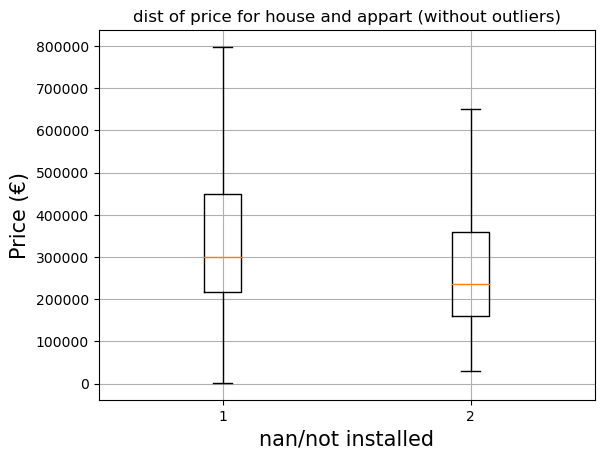

In [2]:
df_nan = df_final[df_final['Fully_equipped_kitchen'].isna()]
df_not_installed = df_final[df_final['Fully_equipped_kitchen'] == "NOT_INSTALLED" ]

plt.boxplot([df_nan['Price'], df_not_installed['Price']], showfliers=False)
plt.xlabel('nan/not installed', fontsize=15)
plt.ylabel("Price (€)", fontsize=15)
plt.title("dist of price for house and appart (without outliers)")
plt.grid(True)

plt.show()

It looks like nan can't be considered as not installed
think how to deal with them...

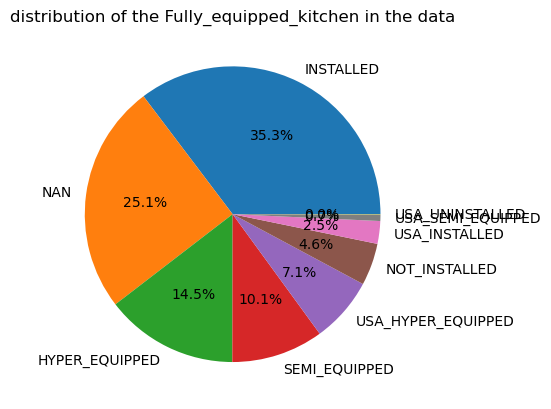

In [3]:
#if we consider nan = not installed:
df_final["Fully_equipped_kitchen"] = df_final["Fully_equipped_kitchen"].fillna("NAN")
freq_type = df_final["Fully_equipped_kitchen"].value_counts()
plt.pie(freq_type, labels=freq_type.index, autopct='%1.1f%%')
plt.title("distribution of the Fully_equipped_kitchen in the data")
plt.show()

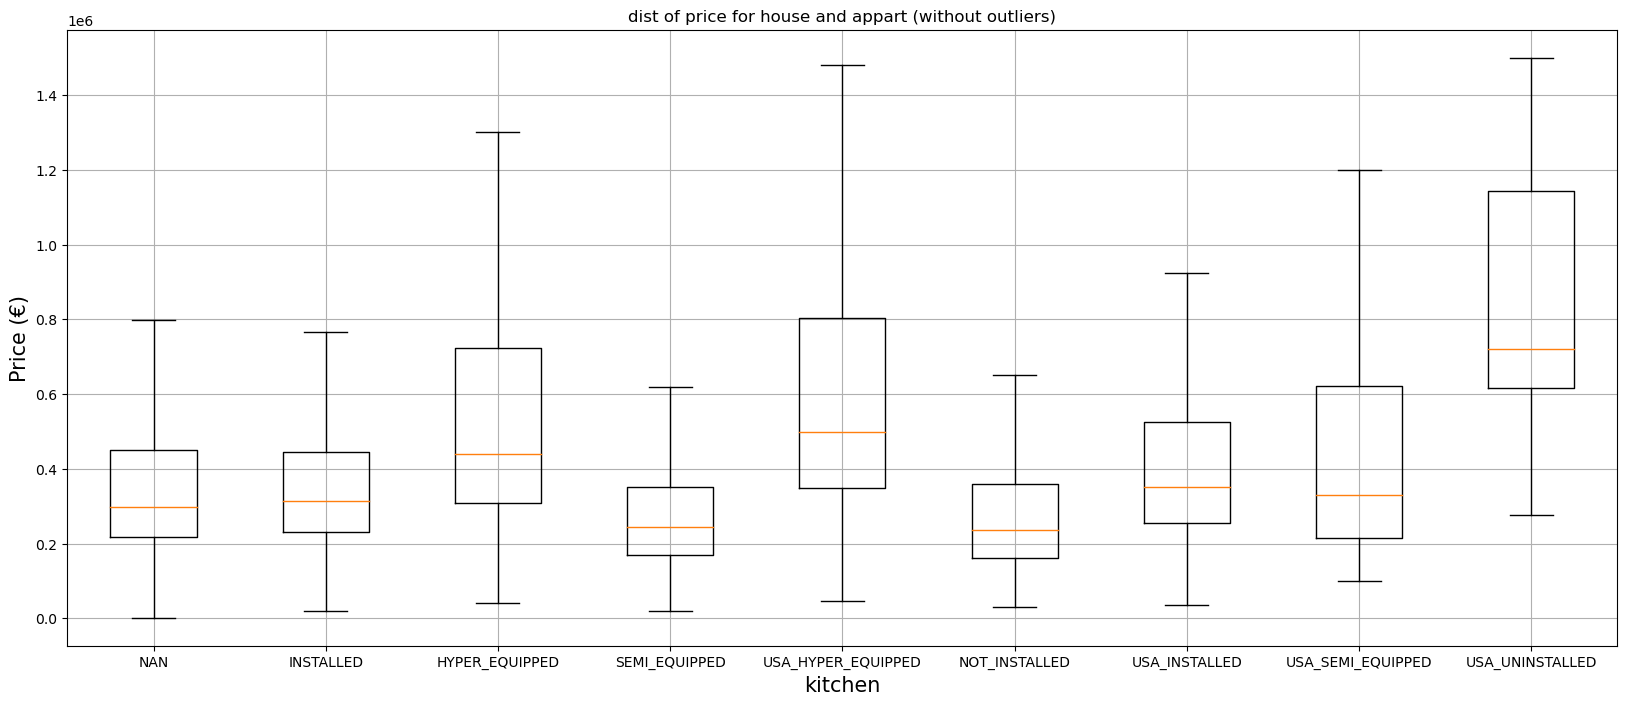

In [4]:
df_nan = df_final[df_final['Fully_equipped_kitchen'] == "NAN"]
df_installed = df_final[df_final['Fully_equipped_kitchen'] == "INSTALLED" ]
df_hyper = df_final[df_final['Fully_equipped_kitchen'] == "HYPER_EQUIPPED" ]
df_semi = df_final[df_final['Fully_equipped_kitchen'] == "SEMI_EQUIPPED" ]
df_usa_h = df_final[df_final['Fully_equipped_kitchen'] == "USA_HYPER_EQUIPPED" ]
df_n_i = df_final[df_final['Fully_equipped_kitchen'] == "NOT_INSTALLED" ]
df_usa_i = df_final[df_final['Fully_equipped_kitchen'] == "USA_INSTALLED" ]
df_usa_se = df_final[df_final['Fully_equipped_kitchen'] == "USA_SEMI_EQUIPPED" ]
df_usa_u = df_final[df_final['Fully_equipped_kitchen'] == "USA_UNINSTALLED" ]

plt.figure(figsize=(20, 8))
plt.boxplot([df_nan['Price'], df_installed['Price'], df_hyper['Price'], df_semi['Price'], df_usa_h['Price'], df_n_i['Price'], df_usa_i['Price'], df_usa_se['Price'], df_usa_u['Price']], 
            showfliers=False, 
            labels=['NAN', 'INSTALLED', 'HYPER_EQUIPPED', 'SEMI_EQUIPPED', 'USA_HYPER_EQUIPPED', 'NOT_INSTALLED', 'USA_INSTALLED', 'USA_SEMI_EQUIPPED', 'USA_UNINSTALLED'])
plt.xlabel('kitchen', fontsize=15)
plt.ylabel("Price (€)", fontsize=15)
plt.title("dist of price for house and appart (without outliers)")
plt.grid(True)

plt.savefig(r'.\images\kitchen.jpg')
plt.show()

usa uninstalled seems strange: higher price than installed?: (7 in total, doesn't mean we have to delete it)

In [10]:
print(len(df_usa_u))

7
